# Flower Species Recognition 

# load libraries 

In [3]:
import numpy as np
import pandas as pd
#import tensorflow
#import keras
import cv2
import glob
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from skimage.feature import hog
from sklearn.cluster import  KMeans
from sklearn.metrics import confusion_matrix, silhouette_score
import seaborn as sns

# load the images 

In [4]:
image_paths = glob.glob(r"C:\Users\DELL\Downloads\ML_project\jpg\*.jpg")
image_paths = sorted(
    image_paths,
    key=lambda x: int(x.split("_")[-1].split(".")[0])
)

print("Number of images:", len(image_paths))

Number of images: 8189


In [5]:
before_shape=[]
for i in image_paths:
    before=cv2.imread(i) 
    before_shape.append(before.shape)


In [6]:
before_shape

[(500, 591, 3),
 (500, 625, 3),
 (667, 500, 3),
 (500, 667, 3),
 (500, 508, 3),
 (500, 535, 3),
 (500, 667, 3),
 (500, 667, 3),
 (510, 500, 3),
 (500, 667, 3),
 (748, 500, 3),
 (500, 530, 3),
 (500, 666, 3),
 (500, 645, 3),
 (500, 755, 3),
 (500, 752, 3),
 (500, 531, 3),
 (500, 751, 3),
 (500, 667, 3),
 (501, 762, 3),
 (500, 666, 3),
 (529, 500, 3),
 (500, 754, 3),
 (500, 666, 3),
 (500, 754, 3),
 (500, 720, 3),
 (500, 617, 3),
 (500, 667, 3),
 (500, 667, 3),
 (500, 667, 3),
 (500, 667, 3),
 (500, 571, 3),
 (500, 666, 3),
 (500, 715, 3),
 (500, 666, 3),
 (500, 667, 3),
 (500, 667, 3),
 (500, 750, 3),
 (500, 644, 3),
 (500, 667, 3),
 (500, 565, 3),
 (500, 556, 3),
 (500, 667, 3),
 (500, 667, 3),
 (500, 721, 3),
 (500, 666, 3),
 (500, 617, 3),
 (667, 500, 3),
 (501, 614, 3),
 (500, 667, 3),
 (500, 666, 3),
 (500, 667, 3),
 (604, 500, 3),
 (500, 750, 3),
 (500, 666, 3),
 (500, 666, 3),
 (500, 667, 3),
 (500, 754, 3),
 (500, 666, 3),
 (500, 740, 3),
 (500, 667, 3),
 (500, 674, 3),
 (510, 5

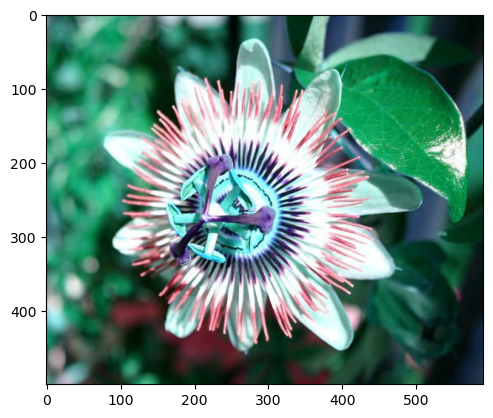

In [7]:
plt.imshow(cv2.imread(image_paths[0]))

# load the lables 

In [8]:
labels_mat = loadmat(r"C:\Users\DELL\Downloads\ML_project\imagelabels.mat")
labels = labels_mat["labels"][0] 
print("Number of labels:", len(labels))

Number of labels: 8189


In [9]:
labels

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

# resize and read each image 

In [10]:
IMG_SIZE = 128

images = []

for path in image_paths:
    img = cv2.imread(path)

    if img is None:
        continue  # safety check

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    images.append(img)

images = np.array(images)
print(images.shape)

(8189, 128, 128, 3)


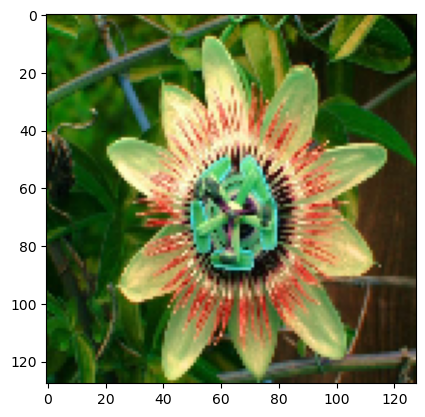

In [11]:
plt.imshow(images[1])

# Count each lables with the number of images inside each 

In [12]:
unique, counts = np.unique(labels, return_counts=True)
class_counts = dict(zip(unique, counts))

In [13]:
class_counts

{np.uint8(1): np.int64(40),
 np.uint8(2): np.int64(60),
 np.uint8(3): np.int64(40),
 np.uint8(4): np.int64(56),
 np.uint8(5): np.int64(65),
 np.uint8(6): np.int64(45),
 np.uint8(7): np.int64(40),
 np.uint8(8): np.int64(85),
 np.uint8(9): np.int64(46),
 np.uint8(10): np.int64(45),
 np.uint8(11): np.int64(87),
 np.uint8(12): np.int64(87),
 np.uint8(13): np.int64(49),
 np.uint8(14): np.int64(48),
 np.uint8(15): np.int64(49),
 np.uint8(16): np.int64(41),
 np.uint8(17): np.int64(85),
 np.uint8(18): np.int64(82),
 np.uint8(19): np.int64(49),
 np.uint8(20): np.int64(56),
 np.uint8(21): np.int64(40),
 np.uint8(22): np.int64(59),
 np.uint8(23): np.int64(91),
 np.uint8(24): np.int64(42),
 np.uint8(25): np.int64(41),
 np.uint8(26): np.int64(41),
 np.uint8(27): np.int64(40),
 np.uint8(28): np.int64(66),
 np.uint8(29): np.int64(78),
 np.uint8(30): np.int64(85),
 np.uint8(31): np.int64(52),
 np.uint8(32): np.int64(45),
 np.uint8(33): np.int64(46),
 np.uint8(34): np.int64(40),
 np.uint8(35): np.int64

In [14]:
sorted_class_counts = dict(
    sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
)

In [15]:
sorted_class_counts

{np.uint8(51): np.int64(258),
 np.uint8(77): np.int64(251),
 np.uint8(46): np.int64(196),
 np.uint8(73): np.int64(194),
 np.uint8(89): np.int64(184),
 np.uint8(74): np.int64(171),
 np.uint8(81): np.int64(166),
 np.uint8(94): np.int64(162),
 np.uint8(88): np.int64(154),
 np.uint8(78): np.int64(137),
 np.uint8(83): np.int64(131),
 np.uint8(43): np.int64(130),
 np.uint8(95): np.int64(128),
 np.uint8(41): np.int64(127),
 np.uint8(75): np.int64(120),
 np.uint8(58): np.int64(114),
 np.uint8(82): np.int64(112),
 np.uint8(56): np.int64(109),
 np.uint8(60): np.int64(109),
 np.uint8(37): np.int64(108),
 np.uint8(76): np.int64(107),
 np.uint8(80): np.int64(105),
 np.uint8(65): np.int64(102),
 np.uint8(72): np.int64(96),
 np.uint8(44): np.int64(93),
 np.uint8(53): np.int64(93),
 np.uint8(50): np.int64(92),
 np.uint8(23): np.int64(91),
 np.uint8(96): np.int64(91),
 np.uint8(11): np.int64(87),
 np.uint8(12): np.int64(87),
 np.uint8(84): np.int64(86),
 np.uint8(8): np.int64(85),
 np.uint8(17): np.int

# Choose top 5 classes 

In [16]:
selected_classes = list(sorted_class_counts.keys())[:5]
print("Selected classes:", selected_classes)

Selected classes: [np.uint8(51), np.uint8(77), np.uint8(46), np.uint8(73), np.uint8(89)]


# appending the images for the 5 lables 

In [17]:
IMG_SIZE = 128

filtered_images = []
filtered_labels = []

for img, label in zip(images, labels):
    if label in selected_classes:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        filtered_images.append(img)
        filtered_labels.append(label)

filtered_images = np.array(filtered_images)
filtered_labels = np.array(filtered_labels)

print("Filtered images:", filtered_images.shape)
print("Filtered labels:", filtered_labels.shape)

Filtered images: (1083, 128, 128, 3)
Filtered labels: (1083,)


# assigning new names for the lables 

In [18]:
label_map = {cls: i for i, cls in enumerate(selected_classes)}
new_labels = np.array([label_map[l] for l in filtered_labels])

print("New label set:", np.unique(new_labels))

New label set: [0 1 2 3 4]


# Extract HOG features

In [19]:
X = []

for img in filtered_images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features = hog(
        gray,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        feature_vector=True
    )
    X.append(features)

X = np.array(X)
print("Feature matrix shape:", X.shape)

Feature matrix shape: (1083, 8100)


In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    new_labels,
    test_size=0.3,           
    stratify=new_labels,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.67,          
    stratify=y_temp,
    random_state=42
)

In [21]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (758, 8100)
Validation shape: (107, 8100)
Test shape: (218, 8100)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

k = 5

In [23]:
kmeans = KMeans(
    n_clusters=5,
    random_state=42,
    n_init=10
)

kmeans.fit(X_train)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [25]:
scores = []
for k in range(2, 10):
    kmeansSilhouette = KMeans(n_clusters=k, random_state=42)
    KMlabels = kmeansSilhouette.fit_predict(X_val) 
    score = silhouette_score(X_val, KMlabels)
    scores.append((k, score))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [37]:
scores

[(2, 0.014466853106284594),
 (3, 0.01623030532209434),
 (4, -0.001364378552693024),
 (5, -0.0016682263427872052),
 (6, -0.0009591167499558822),
 (7, -0.004733173180154184),
 (8, -0.006280903508356226),
 (9, -0.004532840842091481)]

k=2, silhouette score=0.014
k=3, silhouette score=0.016
k=4, silhouette score=-0.001
k=5, silhouette score=-0.002
k=6, silhouette score=-0.001
k=7, silhouette score=-0.005
k=8, silhouette score=-0.006
k=9, silhouette score=-0.005


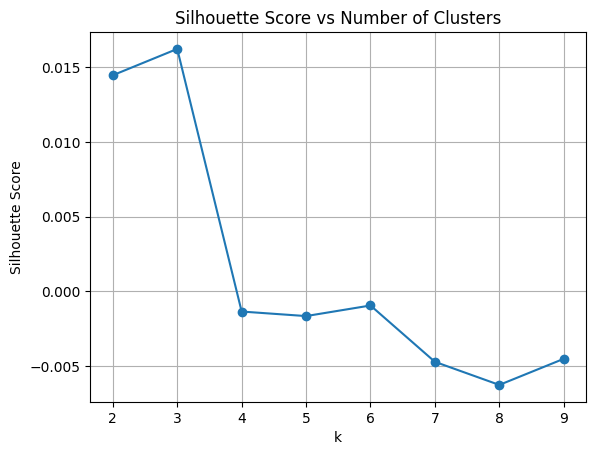

In [38]:
for k, s in scores:
    print(f"k={k}, silhouette score={s:.3f}")
ks = [k for k, s in scores]
ss = [s for k, s in scores]

plt.plot(ks, ss, marker='o') 
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

In [17]:
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, test_clusters)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – KMeans vs True Labels")
plt.xlabel("Cluster ID")
plt.ylabel("True Class")
plt.show()

NameError: name 'test_clusters' is not defined